shape of reduced 2 component pca (60000, 2)
               PC1         PC2  label
0      -123.932589 -312.674262      5
1     -1011.718376 -294.857038      0
2        51.849608  392.173153      4
3       799.127037 -607.197217      1
4       382.754942  730.542867      9
...            ...         ...    ...
59995    99.621760 -293.475562      8
59996  -152.757810 -687.899701      3
59997   178.053450  160.078211      5
59998  -130.606072   -5.591936      6
59999   173.435952  -24.718802      8

[60000 rows x 3 columns]


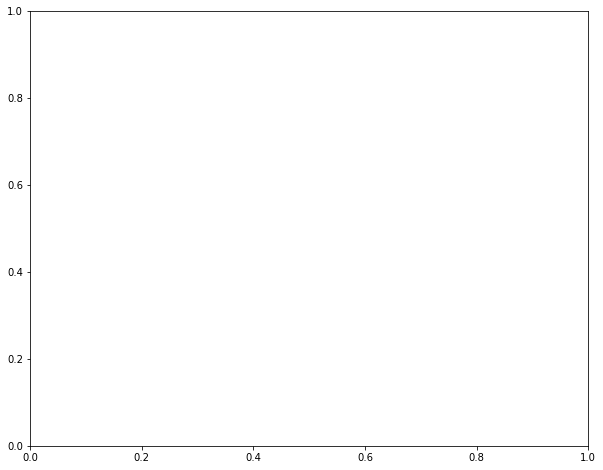

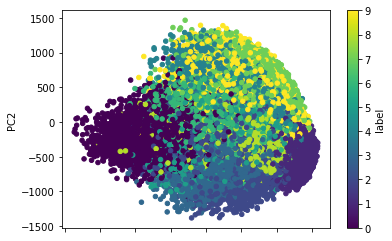

shape of 10 component eigen vectors (10, 784)


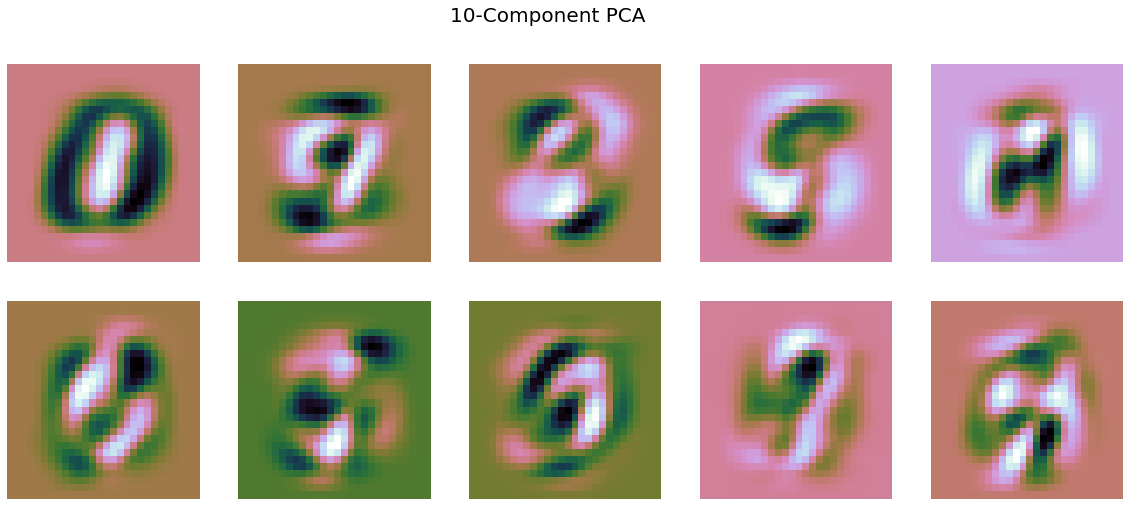

--------------------------------------------------------------------------
Training with raw data using Logistic Regreesion and softmax
Epoch 1/10
469/469 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.8327
Epoch 2/10
469/469 [==============================] - 0s 993us/step - loss: 0.3613 - accuracy: 0.9028
Epoch 3/10
469/469 [==============================] - 0s 974us/step - loss: 0.3191 - accuracy: 0.9120
Epoch 4/10
469/469 [==============================] - 0s 980us/step - loss: 0.2994 - accuracy: 0.9167
Epoch 5/10
469/469 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.9203
Epoch 6/10
469/469 [==============================] - 0s 991us/step - loss: 0.2801 - accuracy: 0.9216
Epoch 7/10
469/469 [==============================] - 0s 974us/step - loss: 0.2741 - accuracy: 0.9239
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2697 - accuracy: 0.9244
Epoch 9/10
469/469 [==============================] - 

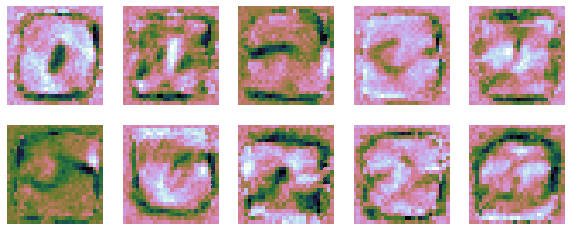

Epoch 1/10
469/469 [==============================] - 0s 785us/step - loss: -1.0891 - accuracy: 0.2956
Epoch 2/10
469/469 [==============================] - 0s 840us/step - loss: -2.8744 - accuracy: 0.5331
Epoch 3/10
469/469 [==============================] - 0s 878us/step - loss: -4.0869 - accuracy: 0.5443
Epoch 4/10
469/469 [==============================] - 0s 885us/step - loss: -5.1582 - accuracy: 0.5350
Epoch 5/10
469/469 [==============================] - 0s 696us/step - loss: -6.1432 - accuracy: 0.5257
Epoch 6/10
469/469 [==============================] - 0s 734us/step - loss: -7.0985 - accuracy: 0.5193
Epoch 7/10
469/469 [==============================] - 0s 712us/step - loss: -8.0228 - accuracy: 0.5147
Epoch 8/10
292/469 [=================>............] - ETA: 0s - loss: -8.7997 - accuracy: 0.5081

In [ ]:

import numpy as nump
import tensorflow as tensor
import pandas as dataframe
import time
from keras import models
from keras import layers
from keras.utils import to_categorical
import seaborn as sborn
import matplotlib.pyplot as plot


data, test_data = tensor.keras.datasets.mnist.load_data()

X_train = data[0]
y_train = data[1]
X_train = X_train.reshape(-1, 28 * 28)

target = y_train = nump.reshape(y_train, (60000)).T
X_test = test_data[0]
y_test = test_data[1]

X_test = X_test.reshape(-1, 28 * 28)

import numpy as nump


def myPCA(X, k):
    X_mean = nump.mean(X, axis=0)
    X_mean = X - X_mean
    values, vectors = nump.linalg.eigh(nump.cov(X_mean, rowvar=False))
    sorted_values = values[nump.argsort(values)[::-1]]
    sorted_vectors = vectors[:, nump.argsort(values)[::-1]]
    eigenvector_subset = sorted_vectors[:, 0:k].transpose()
    X_pca = nump.dot(eigenvector_subset, X_mean.transpose()).transpose()

    return X_pca


def myeigen(X, k):
    X_mean = nump.mean(X, axis=0)
    X_mean = X - X_mean
    values, vectors = nump.linalg.eigh(nump.cov(X_mean, rowvar=False))
    sorted_values = values[nump.argsort(values)[::-1]]
    sorted_vectors = vectors[:, nump.argsort(values)[::-1]]

    return sorted_vectors[:, 0:k].T * 100


X_train_reduced = myPCA(X_train, 2)
print("shape of reduced 2 component pca",X_train_reduced.shape)
principal_dataframe = dataframe.DataFrame(X_train_reduced, columns=['PC1', 'PC2'])
principal_dataframe['label'] = y_train
print(principal_dataframe)
plot.figure(figsize=(10, 8))
plot.grid(False)
ax2 = principal_dataframe.plot.scatter(x='PC1',y='PC2',c='label',colormap='viridis')
plot.show()

pca_eigen = myeigen(X_train, 10)
print("shape of 10 component eigen vectors",pca_eigen.shape)



fig, axarr = plot.subplots(2, 5, figsize=(20, 8))

count = 0
for i in range(2):
    for j in range(5):
        sborn.heatmap(pca_eigen[count, :].reshape(28, 28), ax=axarr[i][j], cmap='cubehelix',xticklabels=False, yticklabels=False, cbar=False)
        count = count + 1

plot.suptitle('10-Component PCA', fontsize=20)

plot.show()

print("--------------------------------------------------------------------------")
print("Training with raw data using Logistic Regreesion and softmax")

(X_train_images, y_train_labels), (X_test_images, y_test_labels) = tensor.keras.datasets.mnist.load_data()
X_train_images = X_train_images.reshape((60000, 28 * 28)).astype('float32') / 255
X_test_images = X_test_images.reshape((10000, 28 * 28)).astype('float32') / 255

y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model.fit(X_train_images, y_train_labels, epochs=10, batch_size=128)
weights = model.layers[0].get_weights()[0].T

print("--------------------------------------------------------------------------")
print("Shape of weights of 10 nodes", weights.shape)

stop_time = time.time()
elapsed_time = stop_time - start_time



print("Training time with 10 epochs for raw data", elapsed_time)




fig, axarr = plot.subplots(2, 5, figsize=(10, 4))
print("----------Visualizing the data by reshaping it to 28*28 images-----------------------")
count = 0
for i in range(2):
    for j in range(5):
        sborn.heatmap(weights[count, :].reshape(28, 28), ax=axarr[i][j],xticklabels=False, yticklabels=False, cmap='cubehelix',cbar=False)
        count = count + 1
plot.show()

k = 30
X_train_reduced1 = myPCA(X_train_images, k)
X_train_reduced2 = myPCA(y_train_labels, k)
eigenvectors1 = myeigen(X_train_images, k)

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model.fit(X_train_reduced1, X_train_reduced2, epochs=10, batch_size=128)
stop_time = time.time()
elapsed_time = stop_time - start_time
print("Training time with 10 epochs for transformed data", elapsed_time)

# fig, axarr = plot.subplots(2, 5, figsize=(30, 8))

# count=0
# for i in range(2):
#     for j in range(5):
#             sborn.heatmap(eigenvectors1[count,:].reshape(28, 28), ax=axarr[i][j], cmap='cubehelix',cbar=False)
#             count= count+1

# plot.suptitle('30-Component PCA',fontsize=20)

